# Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__1. Load the training data and the test data. No points for this.__

In [1]:
import pandas as pd

# Remember to change this to the path of your files.
train_path = 'data/IMDB_TRAIN.csv'
test_path = 'data/IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_train.head()

,text,class
0,'If you hit your teens in the 70s as I did you...,N
1,'Excellent endearing film with Peter Falk and ...,P
2,'Oh dear what a horrid movie. The production w...,N
3,'This is a terrible production of Bartleby tho...,N
4,'I actually have a fondness for Christopher Le...,N


__2. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy on the test data. Is it good compared to just predicting a positive sentiment for all reviews?__

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(df_imdb_train['text'])

X_train_binary = binary_vectorizer.transform(df_imdb_train['text'])
Y_train = df_imdb_train['class'] == 'P'
X_test_binary = binary_vectorizer.transform(df_imdb_test['text'])
Y_test = df_imdb_test['class'] == 'P'

model_binary = BernoulliNB()
model_binary.fit(X_train_binary, Y_train)
predictions = model_binary.predict(X_test_binary)
print("Accuracy when predicting a positive sentiment for everything: {0}".format(Y_test.mean()))
print("Model's accuracy: {0}".format((predictions == Y_test).mefan()))

Accuracy when predicting a positive sentiment for everything: 0.4988235294117647


AttributeError: 'Series' object has no attribute 'mefan'

__3. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__
* For example: Instance number 4685 contains the sentence, “Even her worst . . . I will stop here to avoid the spoiler.”  Even though this is actually positive, it was classified as a negative review; I would guess that this is due to the word “worst” in the review.

In [ ]:
false_positives = df_imdb_test[(predictions == 1) & (Y_test ==0)].text
print(false_positives[26])
print()
print(false_positives[36])
print()
print(print(false_positives[293]))

These reviews have positive words and comments despite being negative reviews. The first review talks about the solid performances of some actors. The second review uses positive words such as 'interesting', 'right', and 'solid'. The third review uses the word 'perfectly'. 

In [ ]:
false_negatives = df_imdb_test[(predictions == 0) & (Y_test == 1)].text
print(false_negatives[24])
print()
print(false_negatives[27])
print()
print(false_negatives[49])

These reviews, instead use negative words despite being generally positive. For example, the first review uses the word "sadly". The second uses the words "negative", "stupid", and "barely". Finally, the third review uses the words "horrible" and "trouble". 

__4. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__

__If you want, you can try other classifiers besides Bernoulli Naive Bayes.__

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_vectorizer.fit(df_imdb_train['text'])

X_train_tfidf = tfidf_vectorizer.transform(df_imdb_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(df_imdb_test['text'])

model_tfidf = LogisticRegression(solver='liblinear')
model_tfidf.fit(X_train_tfidf, Y_train)
predictions = model_tfidf.predict(X_test_tfidf)
print("Accuracy when predicting a positive sentiment for everything: {0}".format(Y_test.mean()))
print("Model's accuracy: {0}".format((predictions == Y_test).mean()))

Accuracy when predicting a positive sentiment for everything: 0.4988235294117647
Model's accuracy: 0.9601176470588235


In [5]:
count_vectorizer = CountVectorizer(binary=False)
count_vectorizer.fit(df_imdb_train['text'])

# Transform to counter
X_train_counts = count_vectorizer.transform(df_imdb_train['text'])
X_test_counts = count_vectorizer.transform(df_imdb_test['text'])
print(X_train_counts.shape)
print(X_test_counts.shape)
# Model Fitting:
model_counts = LogisticRegression(solver='liblinear')
model_counts.fit(X_train_counts, Y_train)

(25000, 82549)
(8500, 82549)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
predictions = model_counts.predict(X_test_counts)
print("Accuracy when predicting a positive sentiment for everything: {0}".format(Y_test.mean()))
print("Model's accuracy: {0}".format((predictions == Y_test).mean()))

Accuracy when predicting a positive sentiment for everything: 0.4988235294117647
Model's accuracy: 0.9976470588235294


# Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__1. Load the data. No points for this.__

In [3]:
# Remember to change this to the path of your file.
complaints_path = 'data/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

,Consumer complaint narrative,Product
0,This is not a duplicate case. Please escalate ...,Credit card or prepaid card
1,I reported the problem to Money gram agent. wo...,"Money transfer, virtual currency, or money ser..."
2,"Medical debt is not mine, debt is my sons who ...",Debt collection
3,"Someone called me yesterday morning, XX/XX/201...",Debt collection
4,This is a debt with Conn 's - I am not 30 days...,Debt collection


__2. Print how many complaints there are for each product category.__

In [4]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    24401
Debt collection                                                                 17065
Mortgage                                                                        10552
Credit card or prepaid card                                                      8333
Student loan                                                                     4184
Bank account or service                                                          2985
Checking or savings account                                                      2485
Consumer Loan                                                                    1868
Money transfer, virtual currency, or money service                               1345
Payday loan, title loan, or personal loan                                        1223
Vehicle loan or lease                                                            1134
Name: Product, dtype: int64

__3. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I? HINT: You may want to use [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to transform the target variable into a categorical variable. Take a look at the sample code below.__

In [5]:
# Example of how to transform a text variable into a categorical variable
Y, cat_names = data['Product'].factorize() 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['Consumer complaint narrative']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model_binary = LogisticRegression(multi_class='multinomial', solver='saga')
model_binary.fit(X_train_vec, Y_train)
predictions = model_binary.predict(X_test_vec)
test_acc = (predictions == Y_test).mean()
print("Test set accuracy: {0}%".format(round(test_acc * 100, 2)))

Test set accuracy: 80.34%


Accuracy is lower largely becacuse there are many more classes, and the most popular class accounts for less than one third of the complaints. This implies that there are many more classification mistakes that can be made for any single observation.

__4. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur? HINT: Below there is code building and plotting a confusion matrix using the entire data and random predictions. The code removes the diagonal to highlight prediction errors.__

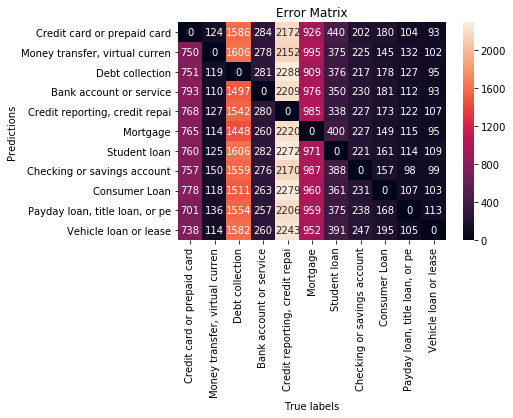

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt


tick_labels = [c[:30] for c in cat_names]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(cat_names)), len(Y))
random_conf_mat = confusion_matrix(random_predictions, Y)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

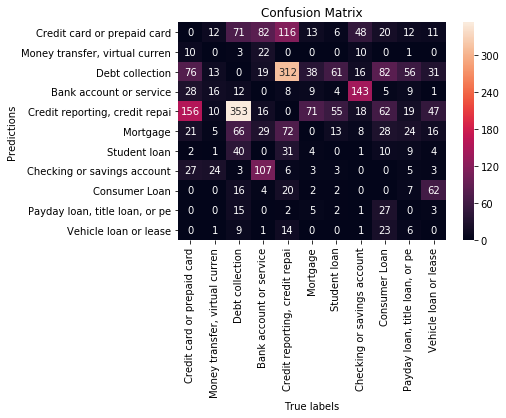

In [18]:
conf_mat = confusion_matrix(predictions, Y_test)
plot_matrix(conf_mat, 'Confusion Matrix')

If predictions were perfect, all the cells not in the diagonal would be filled with zeros. The model systematically confuses 'Checking or savings account' complaints with 'Bank account or service' complaints (and vice versa). You can tell because most of the errors of 'Checking or savings account' complaints were 'Bank account or service' misclassifications (even though this is far from being the most common category). This type of errors are likely to occur because the complaints of these two categories use similar words.

__5. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why. HINT: Below there is a sample code of how to compute the total cost of the random predictions.__

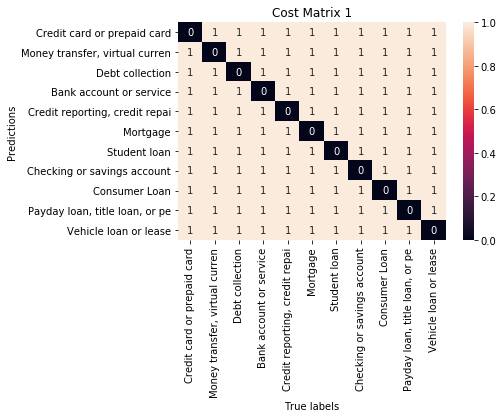

In [12]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')

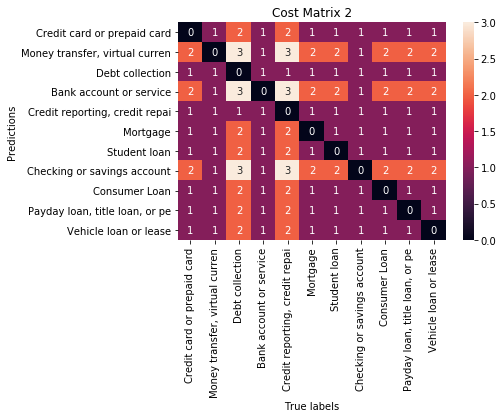

In [13]:
cost_matrix_2 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 2')

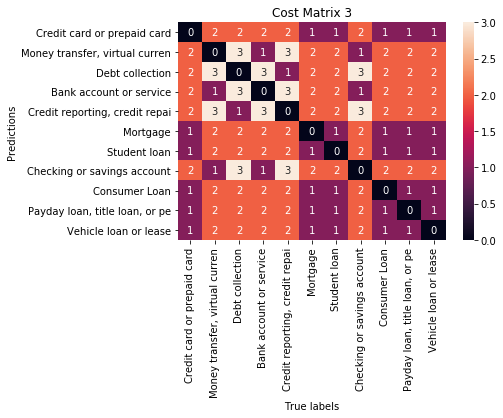

In [14]:
cost_matrix_3 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 3')

In [16]:
print("Cost with matrix 1: ", (conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  2971
Cost with matrix 2:  3615
Cost with matrix 3:  4747


Cost Matrix 2 makes more sense from a business perspective. This matrix gives a larger penalty to models that classify high priority complaints in categories with lower priority. This is important because the business wants to address high priority complaints faster, and the cost of missing them is probably larger. Complaints that are misclassified in a category with the same or a higher priority are also penalized, but not as much. In these cases, the agent can forward the complaint to someone knowledgable in the matter or just postpone the revision of the complaint. 

There are at least a couple of things that we should consider changing:
* We should spend more time thinking about how much more should we penalize high priority complaints that are given a lower priority product category, and then adjust the matrix accordingly. 
* We should also consider that agents probably have several areas of expertise. For example, agents that know a lot about consumer loans may also know a lot about vehicle loans. If this is the case, complaints about vehicle loans that are incorrectly classified as complaints about consumer loans should not be penalized as much. These agents will be able to take care about these incorrectly classified complaints without fowarding them to other agents.